# OC-CORS: Reclassification of Ovarian Cancer Patients Based on Cell-of-Origin Single Cell Gene Expression Signatures

This project aims to improve the molecular classification of ovarian cancer by reclassifying patients based on gene expression signatures derived from the normal cell-of-origin biology, inferred through single-cell transcriptomics. The pipeline leverages Scanpy to perform quality control, normalization, dimensionality reduction, clustering, and marker gene identification. This approach holds potential for refining prognostic groups and tailoring targeted therapies by grounding patient stratification in developmental and lineage biology.

**OC-CORS** stands for **Ovarian Cancer – Cell-Of-origin Reclassification Signature**.


### Library Installation

We install the core libraries for single-cell RNA-seq analysis with Scanpy.

In [2]:
pip install scanpy anndata matplotlib seaborn pandas numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 30.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 13.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


### Clustering and Dimensionality Reduction Dependencies

We install `leidenalg` and `igraph`, which are used for Leiden clustering.

In [3]:
pip install leidenalg igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 27.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### UMAP Installation

We install `umap-learn` for dimensionality reduction and visualization.

In [4]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


### Import Libraries

We import the necessary Python libraries for data handling and visualization.

In [5]:
# Manejo de datos
import scanpy as sc
import anndata
import numpy as np
import pandas as pd

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Opción: evitar warnings molestos
import warnings
warnings.filterwarnings('ignore')


In [6]:
print("Scanpy:", sc.__version__)
print("AnnData:", anndata.__version__)

Scanpy: 1.11.3
AnnData: 0.11.4


### Load the `.h5ad` File

We load the single-cell dataset in `.h5ad` format generated in Galaxy using Scanpy.

In [7]:
anndata = get(31)  # obtener desde Galaxy
adata = sc.read_h5ad('/import/31')  # adaptá la ruta si cambia

In [8]:
adata

AnnData object with n_obs × n_vars = 38775 × 27984
    obs: 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'n_genes', 'n_counts'
    var: 'gene_ids', 'feature_types', 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'n_counts'

### Quality Control Visualization

We inspect quality metrics (gene counts, total counts, mitochondrial content) across batches using violin plots.

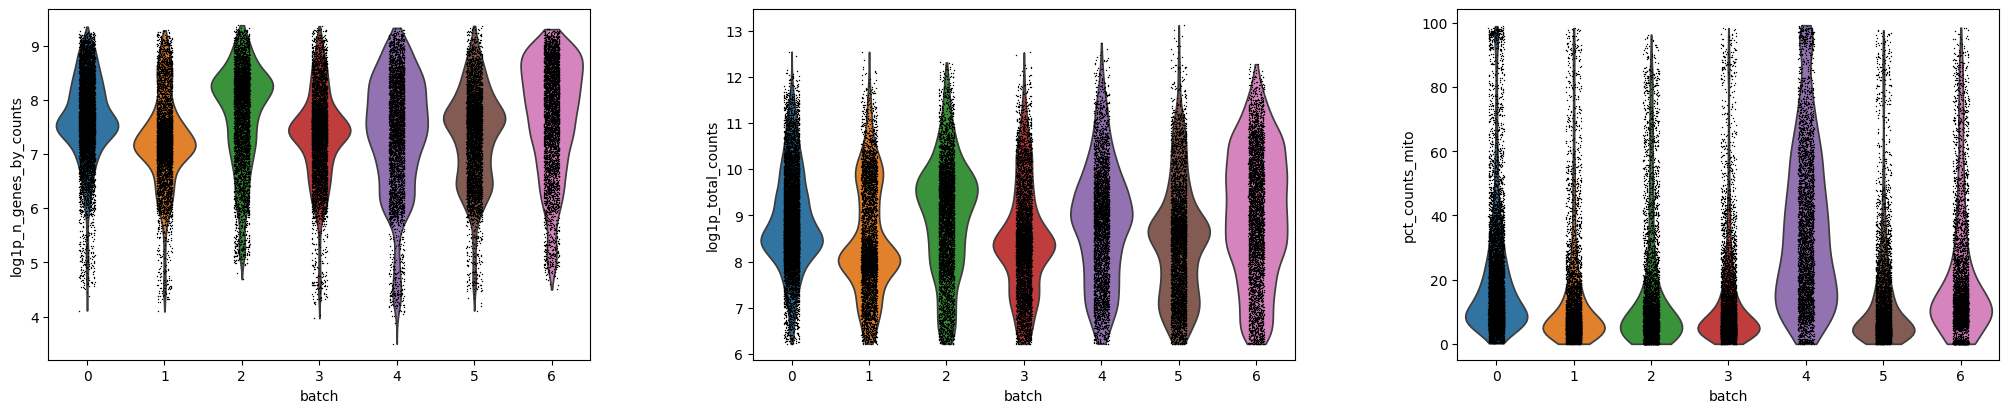

In [9]:
sc.pl.violin(
    adata,
    ["log1p_n_genes_by_counts", "log1p_total_counts", "pct_counts_mito"],
    multi_panel=True,
    groupby="batch"
)

### Cell Filtering Based on QC Metrics

We filter out low-quality cells based on predefined thresholds on quality metrics.

In [10]:
FilterGenes = adata[adata.obs.log1p_n_genes_by_counts <= 9, :]
FilterGenesFinal = FilterGenes[FilterGenes.obs.log1p_n_genes_by_counts >= 5.5, :]

In [11]:
FilterCounts = FilterGenesFinal[FilterGenesFinal.obs.log1p_total_counts <= 12, :]
FilterCountsFinal = FilterCounts[FilterCounts.obs.log1p_total_counts >= 7, :]

In [12]:
FilterMito = FilterCountsFinal[FilterCountsFinal.obs.pct_counts_mito <= 25, :]
FilterMitoFinal = FilterMito[FilterMito.obs.pct_counts_mito >= 0, :]

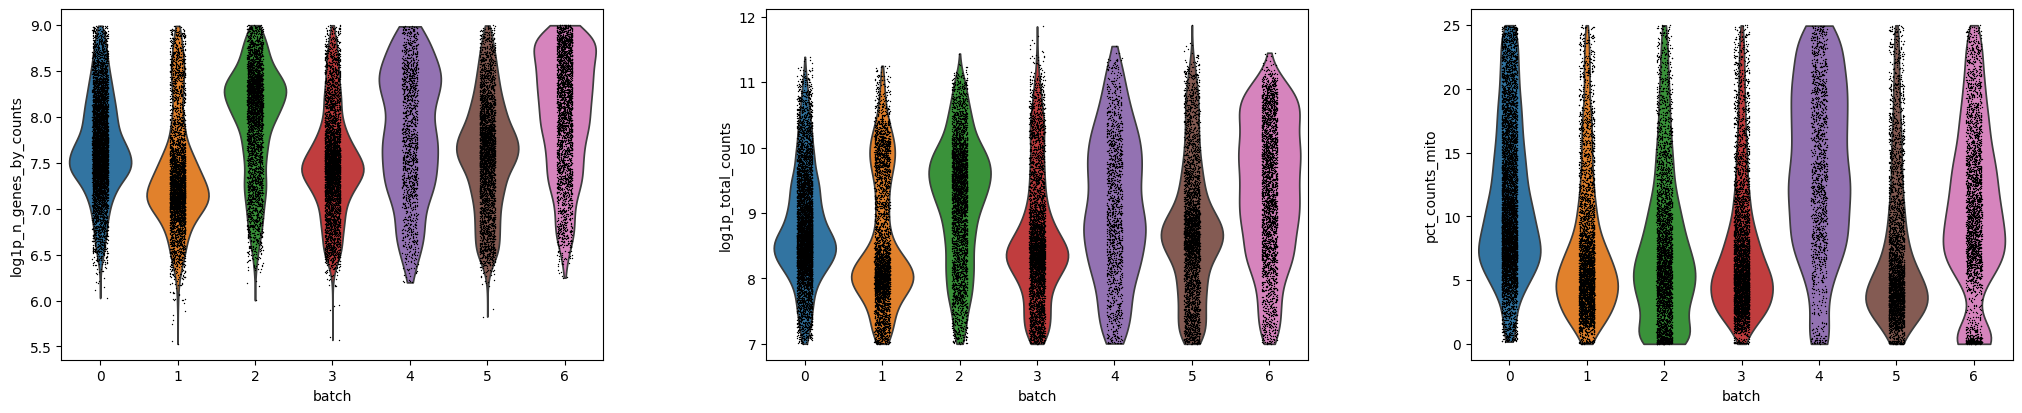

In [13]:
sc.pl.violin(
    FilterMitoFinal,
    ["log1p_n_genes_by_counts", "log1p_total_counts", "pct_counts_mito"],
    multi_panel=True,
    groupby="batch"
)

In [15]:
FilterMitoFinal

View of AnnData object with n_obs × n_vars = 26377 × 27984
    obs: 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'n_genes', 'n_counts'
    var: 'gene_ids', 'feature_types', 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'n_counts'
    uns: 'batch_colors'

In [16]:
sc.pp.filter_genes(FilterMitoFinal, min_cells=3)
sc.pp.filter_genes(FilterMitoFinal, max_cells=1000000000)

In [17]:
FilterMitoFinal.raw = FilterMitoFinal.copy()

In [18]:
FilterMitoFinal

AnnData object with n_obs × n_vars = 26377 × 21841
    obs: 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'n_genes', 'n_counts'
    var: 'gene_ids', 'feature_types', 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'n_counts'
    uns: 'batch_colors'

### Normalization and Log Transformation

We normalize total counts per cell and apply a log transformation to stabilize variance.

In [19]:
sc.pp.normalize_total(FilterMitoFinal, target_sum=1e4)
sc.pp.log1p(FilterMitoFinal)

### Highly Variable Gene Selection

We select the most informative genes that vary across cells for downstream analysis.

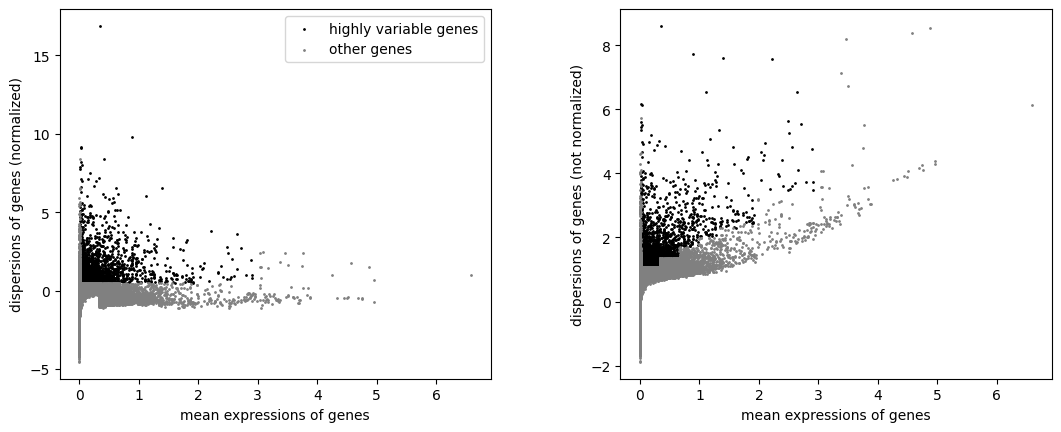

In [20]:
sc.pp.highly_variable_genes(FilterMitoFinal, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(FilterMitoFinal)

In [21]:
FilterMitoFinal

AnnData object with n_obs × n_vars = 26377 × 21841
    obs: 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'n_genes', 'n_counts'
    var: 'gene_ids', 'feature_types', 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'log1p', 'hvg'

### Regress Out Technical Effects

We regress out total counts and mitochondrial percentages, then scale the data.

In [22]:
sc.pp.regress_out(FilterMitoFinal, ["total_counts", "pct_counts_mito"])
sc.pp.scale(FilterMitoFinal, max_value=10)

### Dimensionality Reduction and Visualization

We use PCA followed by UMAP to visualize the cell clusters in reduced dimensions.

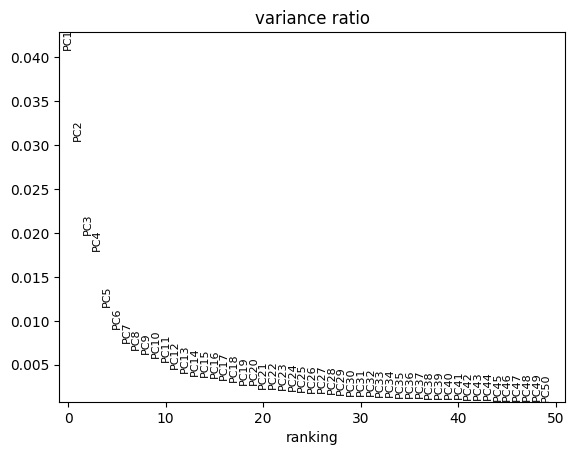

In [23]:
sc.tl.pca(FilterMitoFinal, svd_solver='arpack')
sc.pl.pca_variance_ratio(FilterMitoFinal, n_pcs=50)

## Neighborhood Graph Construction and UMAP Visualization
We construct a k-nearest neighbor graph using the top 20 principal components and 10 neighbors per cell. This graph serves as the basis for manifold learning and clustering. We then compute a UMAP (Uniform Manifold Approximation and Projection) embedding to visualize the data in two dimensions, allowing for intuitive inspection of batch effects, cell groupings, and population structure.

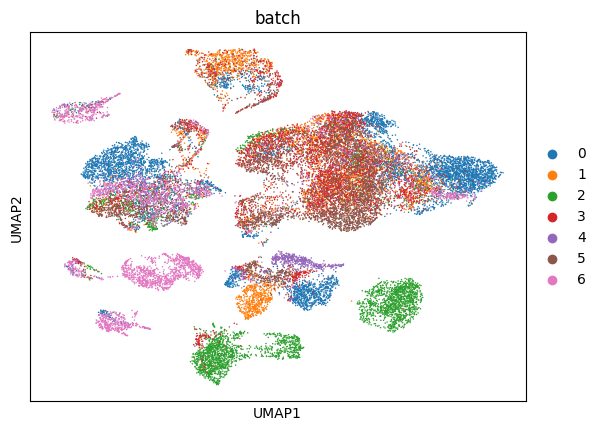

In [24]:
sc.pp.neighbors(FilterMitoFinal, n_neighbors=10, n_pcs=20)
sc.tl.umap(FilterMitoFinal)
sc.pl.umap(FilterMitoFinal, color=["batch"])

### Clustering with Leiden Algorithm

We apply Leiden clustering to identify distinct cell populations.

In [25]:
if 'leiden_colors' in FilterMitoFinal.uns:
    del FilterMitoFinal.uns['leiden_colors']

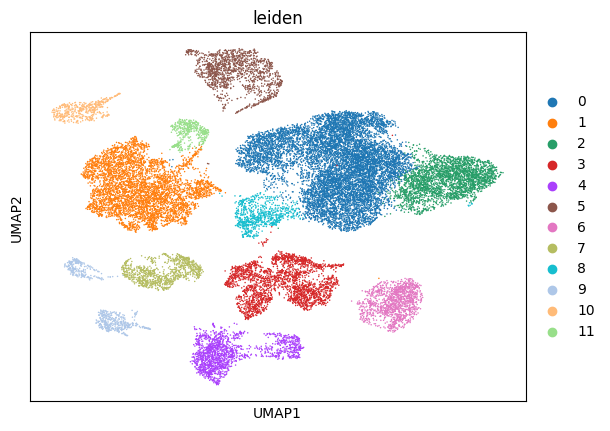

In [26]:
sc.tl.leiden(FilterMitoFinal, resolution=0.1)
sc.pl.umap(FilterMitoFinal, color=["leiden"])

In [27]:
sc.tl.rank_genes_groups(FilterMitoFinal, groupby="leiden", method="wilcoxon", use_raw=False)  # O "wilcoxon"

### Cannonical Markers and Cluster Annotation

We remove genes expressed in too few or too many cells to reduce noise.

In [28]:
df = sc.get.rank_genes_groups_df(FilterMitoFinal, group=None)
df.to_csv("genes_marcadores_wilcoxon.csv", index=False)

In [29]:
df = sc.get.rank_genes_groups_df(FilterMitoFinal, group=None)
df_sig = df[df["pvals_adj"] < 0.05]
df_top25 = (
    df_sig
    .sort_values(["group", "pvals_adj"])
    .groupby("group")
    .head(25)
)
df_top25.to_csv("top25_genes_significativos_por_cluster_wilcoxon.csv", index=False)

saving figure to file figures/rank_genes_groups_leidenranked_genes.pdf


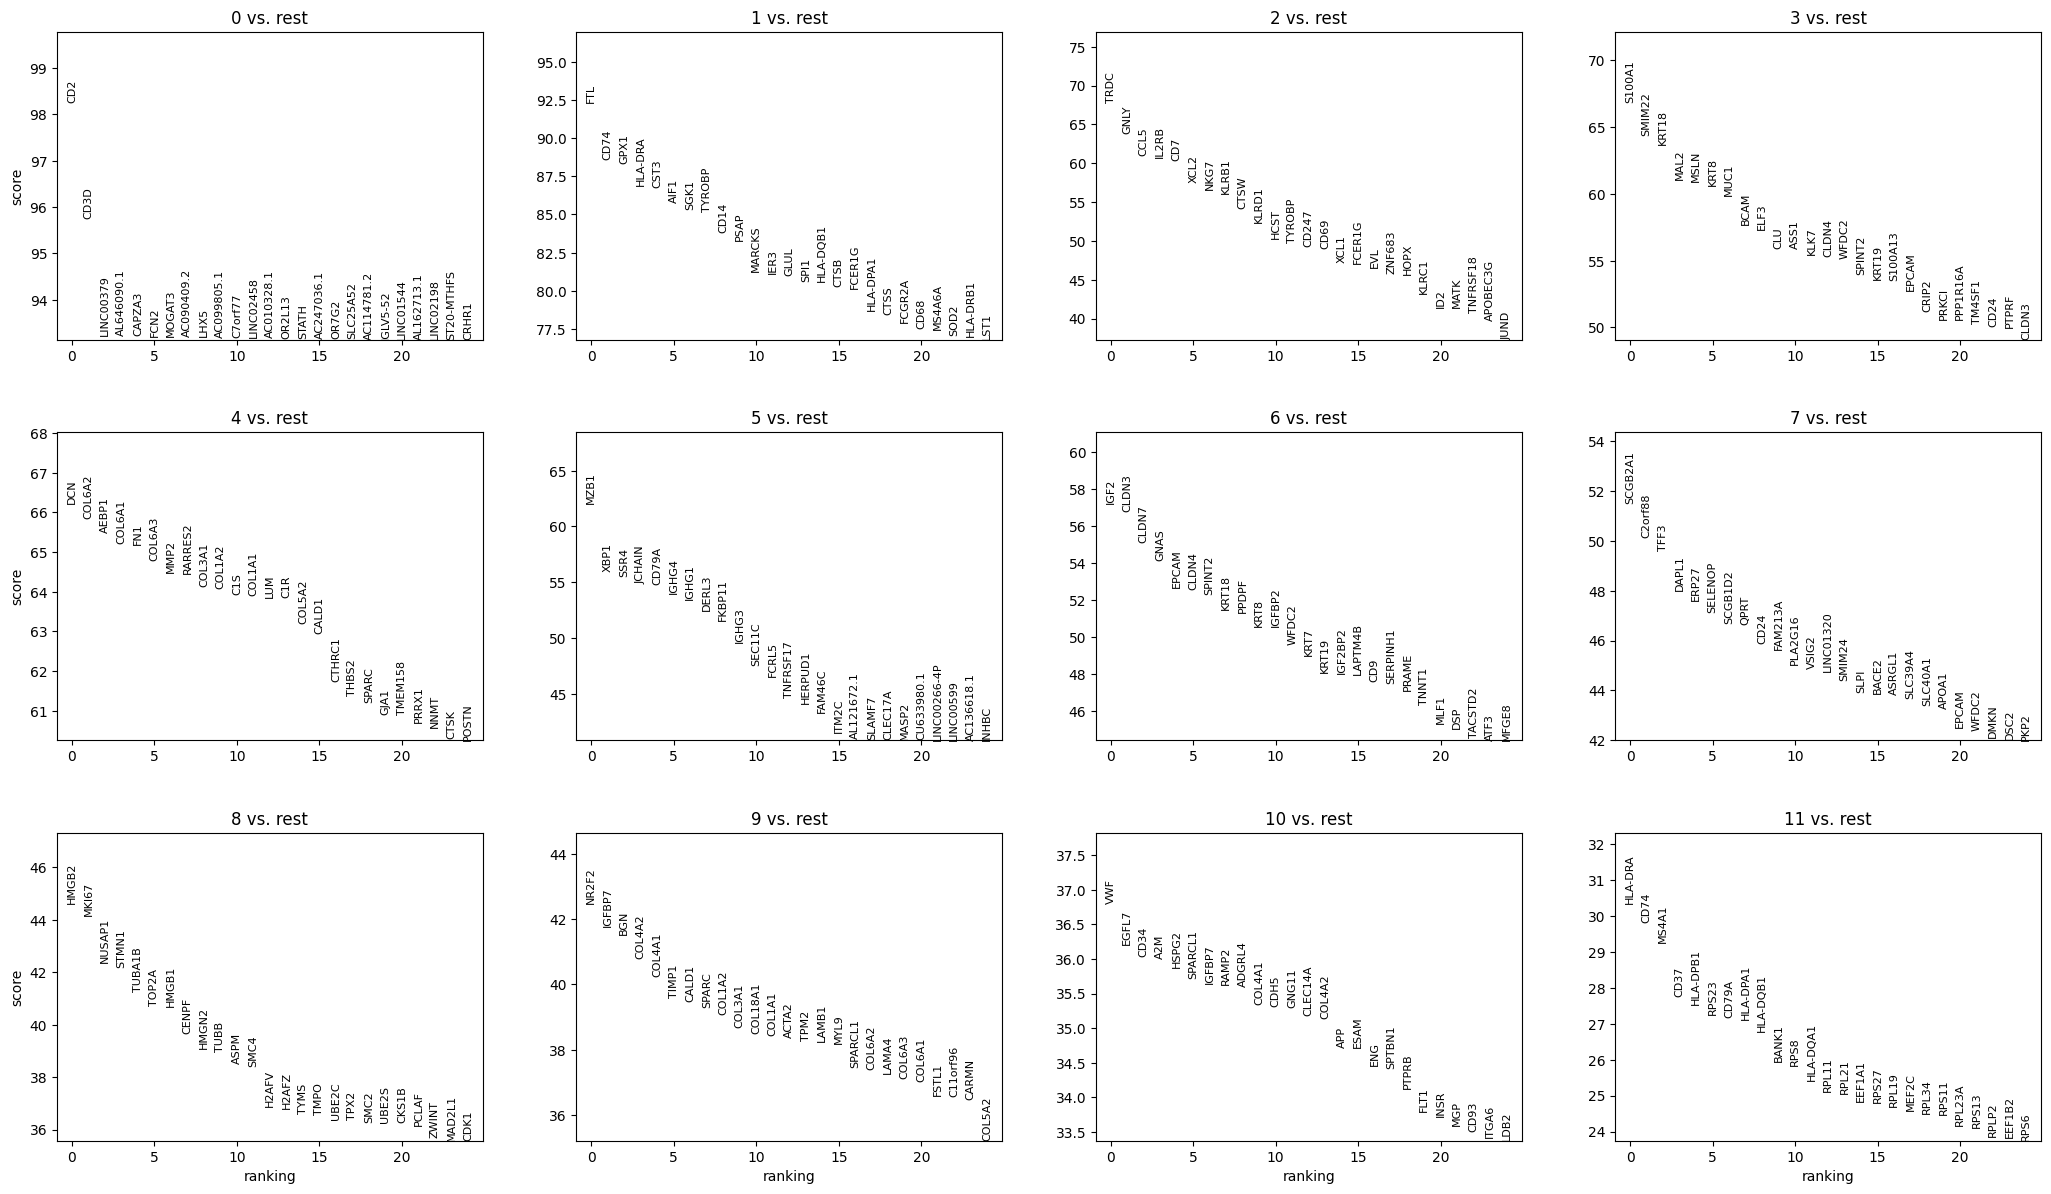

In [30]:
sc.pl.rank_genes_groups(FilterMitoFinal, n_genes=25, sharey=False, save="ranked_genes.pdf")

saving figure to file figures/dotplot__marcadores_ovario.pdf


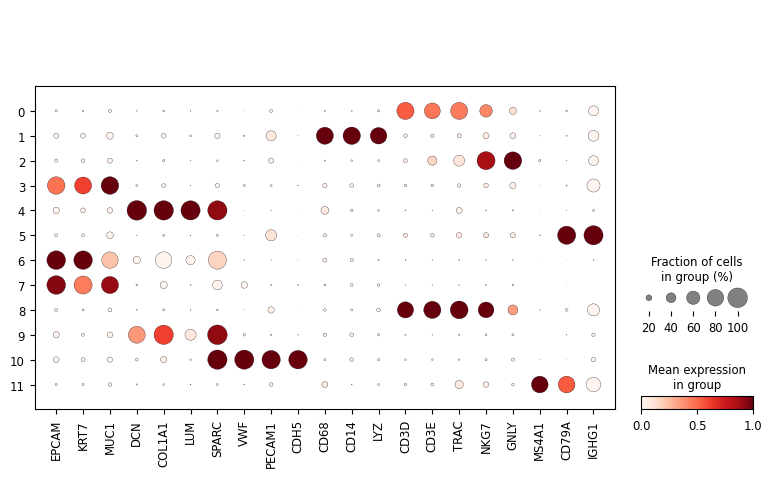

In [32]:
# List of relevant markers
genes_marker = [
    "EPCAM", "KRT7", "MUC1",                   # Epiteliales de Ovario
    "DCN", "COL1A1", "LUM", "SPARC",           # Fibroblastos
    "VWF", "PECAM1", "CDH5",                   # Endoteliales
    "CD68", "CD14", "LYZ",                     # Macrófagos
    "CD3D", "CD3E", "TRAC",                    # Células T
    "NKG7", "GNLY",                            # NK
    "MS4A1", "CD79A", "IGHG1",                 # B / Plasmáticas
]

# Dotplot to visualize distribution by cluster
sc.pl.dotplot(FilterMitoFinal, var_names=genes_marker, groupby="leiden", standard_scale='var', save="_marcadores_ovario.pdf")

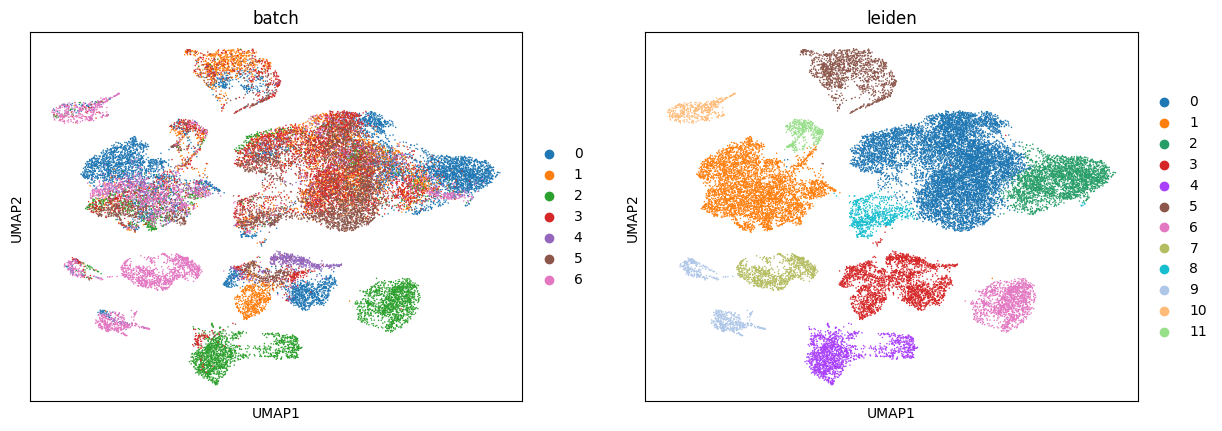

In [33]:
sc.pl.umap(FilterMitoFinal, color=["batch","leiden"])

In [34]:
leiden_to_celltype = {
    "0": "Tcells/OtherInmune",
    "1": "Macrophages",
    "2": "NKcells",
    "3": "Epithelials",
    "4": "Mesenquimal",
    "5": "PlasmaticCells",
    "6": "Epithelials",
    "7": "Epithelials",
    "8": "Tcells/OtherInmune",
    "9": "Mesenquimal",
    "10": "Endothelials",
    "11": "Bcells",
}


In [35]:
FilterMitoFinal.obs["cell_type"] = FilterMitoFinal.obs["leiden"].map(leiden_to_celltype)

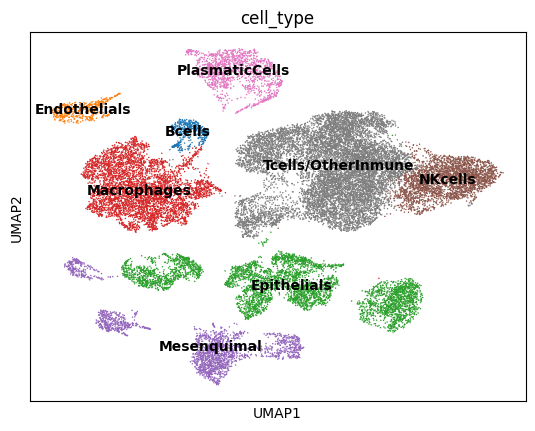

In [36]:
sc.pl.umap(FilterMitoFinal, color="cell_type", legend_loc="on data")

In [37]:
FilterMitoFinal

AnnData object with n_obs × n_vars = 26377 × 21841
    obs: 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'n_genes', 'n_counts', 'leiden', 'cell_type'
    var: 'gene_ids', 'feature_types', 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

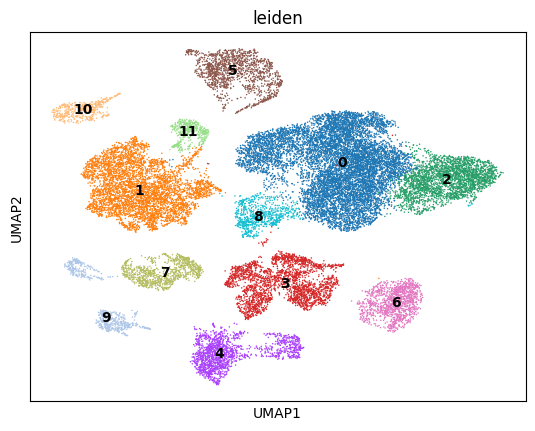

In [38]:
sc.pl.umap(FilterMitoFinal, color="leiden", legend_loc="on data")

## Isolate the epithelial clusters

In [39]:
clusters_epiteliales = ["3", "6", "7"]
adata_epi = FilterMitoFinal[FilterMitoFinal.obs["leiden"].isin(clusters_epiteliales)].copy()

In [40]:
sc.tl.rank_genes_groups(adata_epi, groupby="leiden", method="wilcoxon", use_raw=False)

### Marker Gene Identification

We use Wilcoxon test to find genes differentially expressed in each cluster.

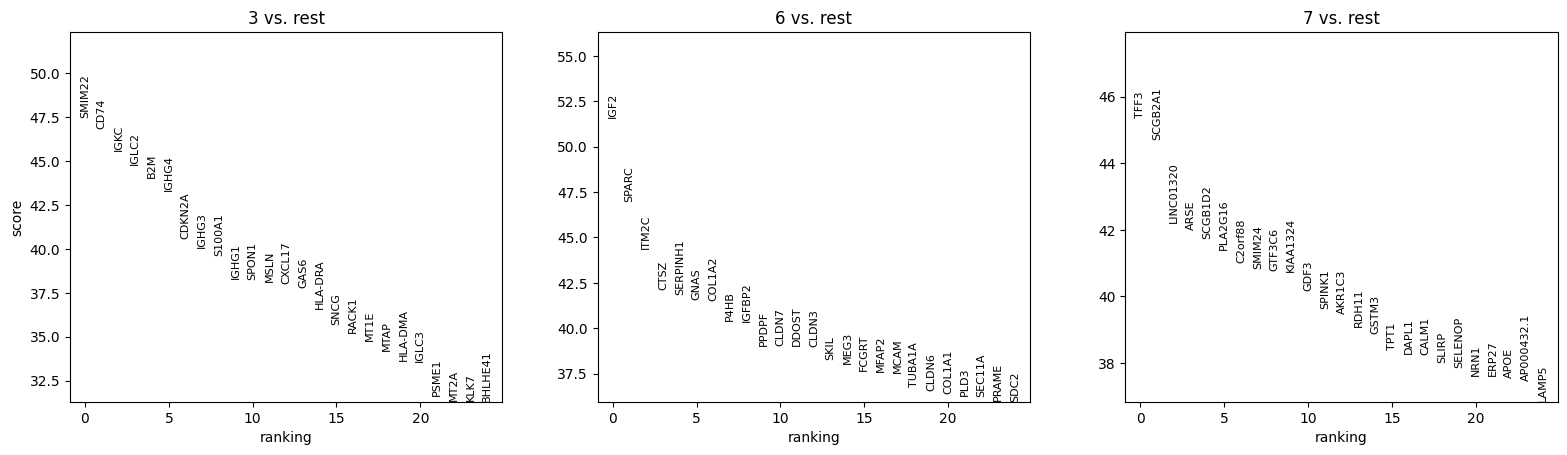

In [41]:
sc.pl.rank_genes_groups(adata_epi, n_genes=25, sharey=False)

In [42]:
df_epit = sc.get.rank_genes_groups_df(adata_epi, group=None)
df_sig = df_epit[df_epit["pvals_adj"] < 0.05]
df_top25 = (
    df_sig
    .sort_values(["group", "pvals_adj"])
    .groupby("group")
    .head(25)
)
df_top25.to_csv("top25_genes_clusters_3_6_7.csv", index=False)

## Define the 3 ovarian tumor subtypes based on the expression profiles of the cell of origin

### Gene Signature Origins for Tumor Subtype Scoring

The following three gene sets correspond to transcriptional profiles derived from normal epithelial subtypes of the fallopian tube (the presumed cell-of-origin of high-grade serous ovarian carcinoma, HGSOC). These signatures are used to classify tumor cells based on their similarity to specific normal epithelial states.

---

#### `genes_DifferentiatedImmune`
This set combines **differentiated epithelial markers** (e.g., `MSLN`, `SPON1`, `S100A1`) with genes involved in immune signaling or antigen presentation (e.g., `CD74`, `B2M`, `IGHG1`, `IGKC`).
- Likely reflects **differentiated epithelial cells with immune interaction**, especially in late-stage tumors.
- Some studies associate this signature with a **secretory-inflammatory** or **mesothelial-immune-like** state within HGSOC.

---

#### `genes_EpithelialInvasive`
This set includes genes such as `IGF2`, `SPARC`, and `COL1A1/2`, which are well-established markers of **invasiveness, extracellular matrix remodeling, and epithelial-to-mesenchymal transition (EMT)**.
- Suggests a profile of **invasive or mesenchymal-like tumor epithelial cells**.
- Associated with more aggressive or early-disseminating ovarian tumors.
- May reflect transformed epithelial cells or EMT-like changes driven by the tumor microenvironment.

---

#### `genes_NormalSecretory`
Genes like `SCGB2A1`, `SCGB1D2`, `TFF3`, and `SELENOP` are canonical markers of **normal secretory cells of the fallopian tube epithelium**.
- Represents a **non-transformed or low-differentiation secretory progenitor state**.
- Considered the **most likely cell-of-origin** for many HGSOC tumors.
- Typically defined using **single-cell RNA-seq** datasets from normal fallopian tube tissue.

---

These signatures were likely derived from:
- scRNA-seq studies of **normal fallopian tube epithelium** and **ovarian cancer tumors** (e.g., Nature Genetics 2020, Nature Medicine 2021).
- Stratification of intrinsic HGSOC subtypes based on gene expression (e.g., *mesenchymal*, *immunoreactive*, *differentiated*, *proliferative*).
- Manual curation from annotated cell clusters in Scanpy or Seurat analyses.

In [43]:
genes_DifferentiatedImmune = [
    "MSLN", "S100A1", "CXCL17", "SPON1", "GAS6",
    "CD74", "B2M", "IGHG1", "IGKC", "GPNMB"
]

In [44]:
genes_EpithelialInvasive = [
    "IGF2", "SPARC", "IGFBP2", "COL1A1", "COL1A2",
    "SERPINH1", "CTSZ", "P4HB", "SKIL", "GNAS"
]

In [45]:
genes_NormalSecretory = [
    "TFF3", "SCGB2A1", "SCGB1D2", "SELENOP", "ERP27",
    "PLA2G16", "CALM1", "APOE", "GSTM3", "C2orf88"
]

## Calculate scores for the 3 ovarian tumor cell subtypes

In [48]:
sc.tl.score_genes(adata_epi, gene_list=genes_DifferentiatedImmune, score_name="score_EpithelialDifferentiated")
sc.tl.score_genes(adata_epi, gene_list=genes_EpithelialInvasive, score_name="score_EpithelialInvasive")
sc.tl.score_genes(adata_epi, gene_list=genes_NormalSecretory, score_name="score_NormalSecretory")

saving figure to file figures/dotplot_DotPlot_Subpopulations.pdf


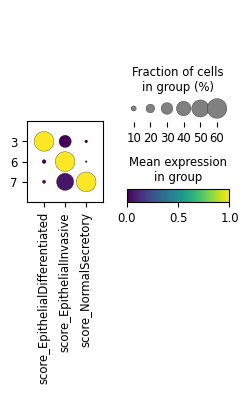

In [49]:
sc.pl.dotplot(
    adata_epi,
    var_names=["score_EpithelialDifferentiated", "score_EpithelialInvasive", "score_NormalSecretory"],
    groupby="leiden",
    standard_scale="var",
    color_map="viridis",
    dot_max=0.6,
    save="DotPlot_Subpopulations.pdf"
)


In [50]:
df_scores = adata_epi.obs[[
    "score_EpithelialDifferentiated",
    "score_EpithelialInvasive",
    "score_NormalSecretory",
    "batch"
]]

score_means_by_batch = df_scores.groupby("batch").mean()
print(score_means_by_batch)


       score_EpithelialDifferentiated  score_EpithelialInvasive  \
batch                                                             
0                            7.883284                  0.001402   
1                           29.150169                 -1.653235   
2                           -5.148118                 32.252491   
3                           11.508037                  2.896331   
4                           13.428777                 -2.993475   
5                           10.910909                 -6.039897   
6                           -4.780607                  0.504066   

       score_NormalSecretory  
batch                         
0                  -2.514428  
1                  -3.858425  
2                  -3.300639  
3                  -2.172311  
4                  -4.699445  
5                  -7.915464  
6                  16.945329  


In [51]:
score_means_by_batch["dominante"] = score_means_by_batch[
    ["score_EpithelialDifferentiated", "score_EpithelialInvasive", "score_NormalSecretory"]
].idxmax(axis=1)


display(score_means_by_batch.sort_values("dominante"))


score_EpithelialDifferentiated  score_EpithelialInvasive  \
batch                                                             
0                            7.883284                  0.001402   
1                           29.150169                 -1.653235   
3                           11.508037                  2.896331   
4                           13.428777                 -2.993475   
5                           10.910909                 -6.039897   
2                           -5.148118                 32.252491   
6                           -4.780607                  0.504066   

       score_NormalSecretory                       dominante  
batch                                                         
0                  -2.514428  score_EpithelialDifferentiated  
1                  -3.858425  score_EpithelialDifferentiated  
3                  -2.172311  score_EpithelialDifferentiated  
4                  -4.699445  score_EpithelialDifferentiated  
5                  -7.915464  score_EpithelialDifferentiated  
2                  -3.300639        score_EpithelialInvasive  
6                  16.945329           score_NormalSecretory

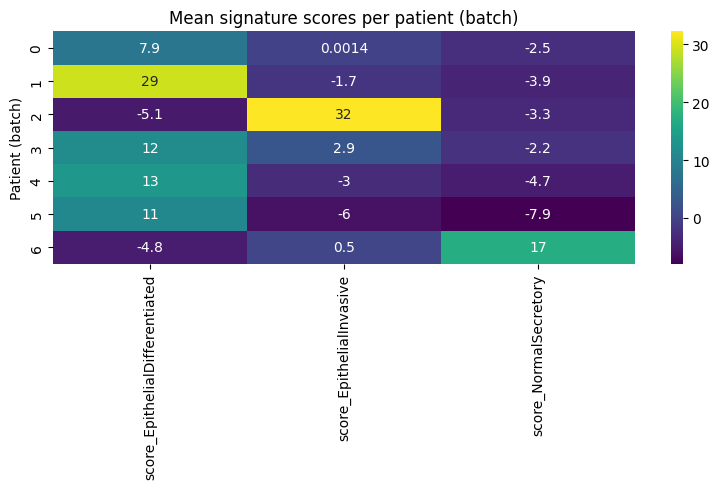

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.heatmap(score_means_by_batch.drop(columns="dominante"), annot=True, cmap="viridis")
plt.title("Mean signature scores per patient (batch)")
plt.ylabel("Patient (batch)")
plt.tight_layout()
plt.show()


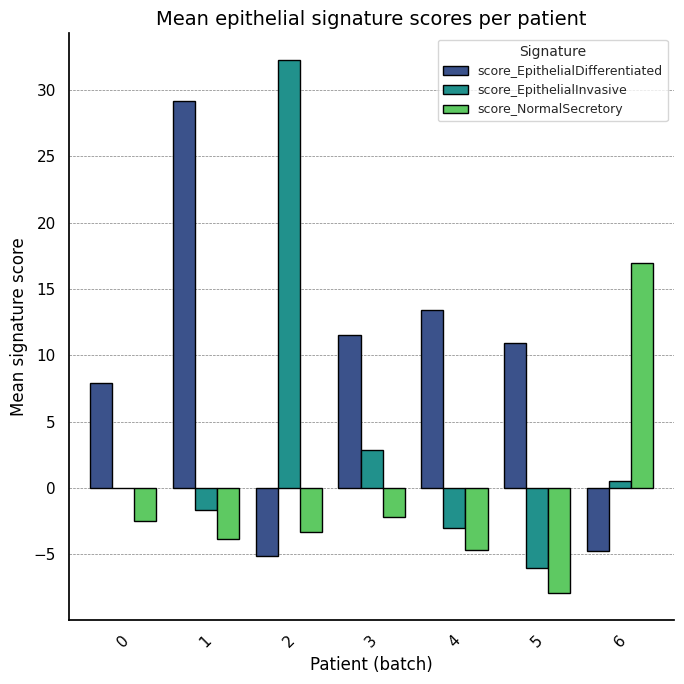

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")

fig, ax = plt.subplots(figsize=(7, 7))  # Ajusta el tamaño aquí

colors = sns.color_palette("viridis", n_colors=3)

score_means_by_batch.plot(
    kind="bar",
    ax=ax,
    width=0.8,
    color=colors,
    edgecolor="black"
)

ax.spines["left"].set_color("black")
ax.spines["bottom"].set_color("black")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.yaxis.grid(True, linestyle="--", linewidth=0.5, color="gray")
ax.xaxis.grid(False)

ax.set_ylabel("Mean signature score", fontsize=12, color="black")
ax.set_xlabel("Patient (batch)", fontsize=12, color="black")
ax.set_title("Mean epithelial signature scores per patient", fontsize=14, color="black")

ax.tick_params(axis='x', colors='black', rotation=45)
ax.tick_params(axis='y', colors='black')

ax.legend(title="Signature", fontsize=9, title_fontsize=10, loc="upper right", frameon=True)

save="BarPlot_SignaturesByPatient.pdf"

plt.tight_layout()
plt.show()

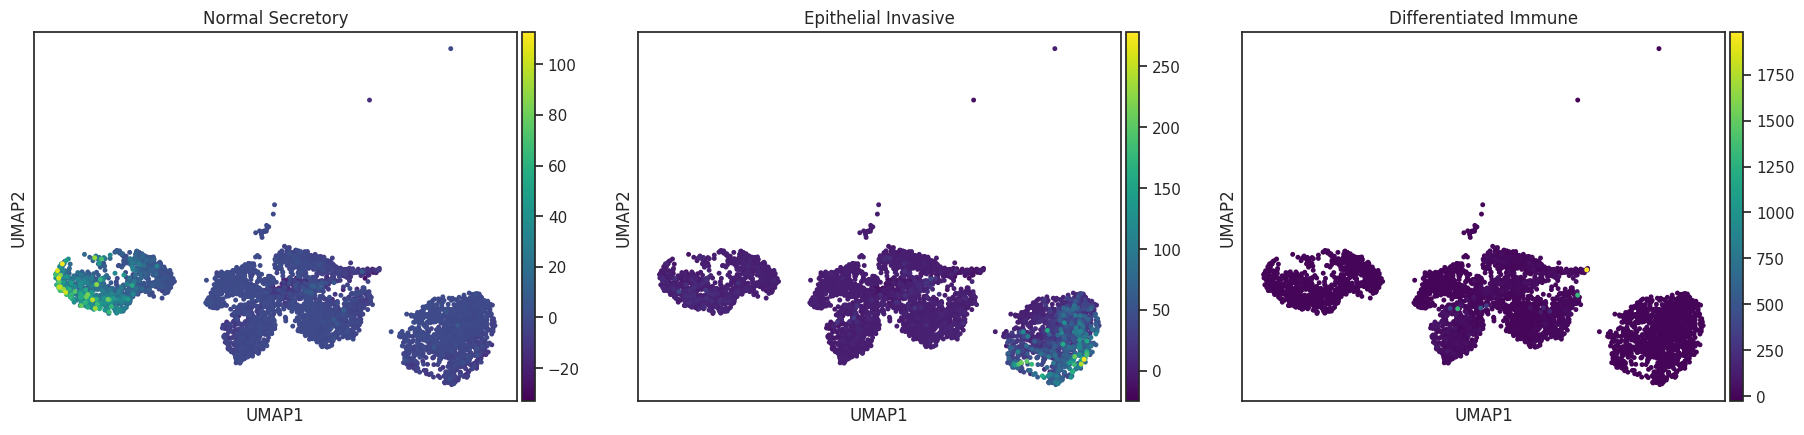

In [55]:
import scanpy as sc

sc.pl.umap(
    adata_epi,
    color=["score_NormalSecretory", "score_EpithelialInvasive", "score_EpithelialDifferentiated"],
    cmap="viridis",
    title=["Normal Secretory", "Epithelial Invasive", "Differentiated Immune"],
    ncols=3,
    size=50,
    show=True
)


## Redefinition of the scores to retain the smallest number of genes that are most specific and effective for subtype classification

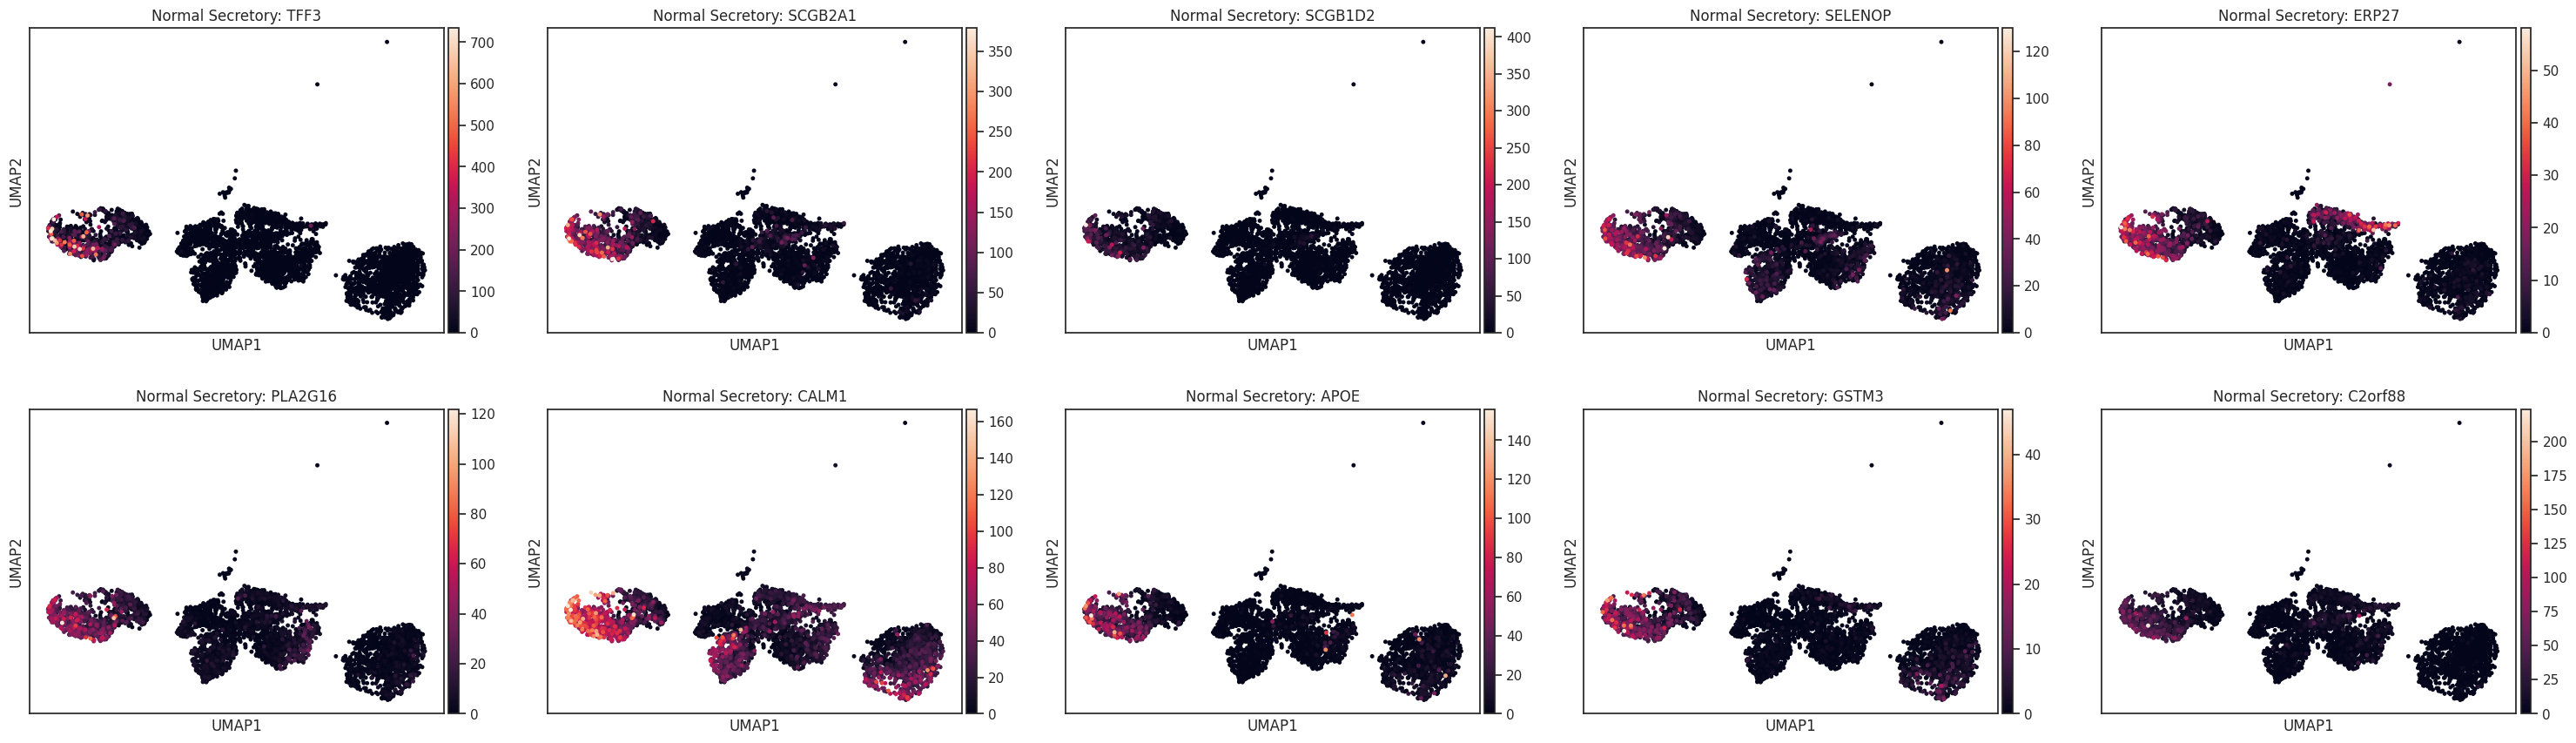

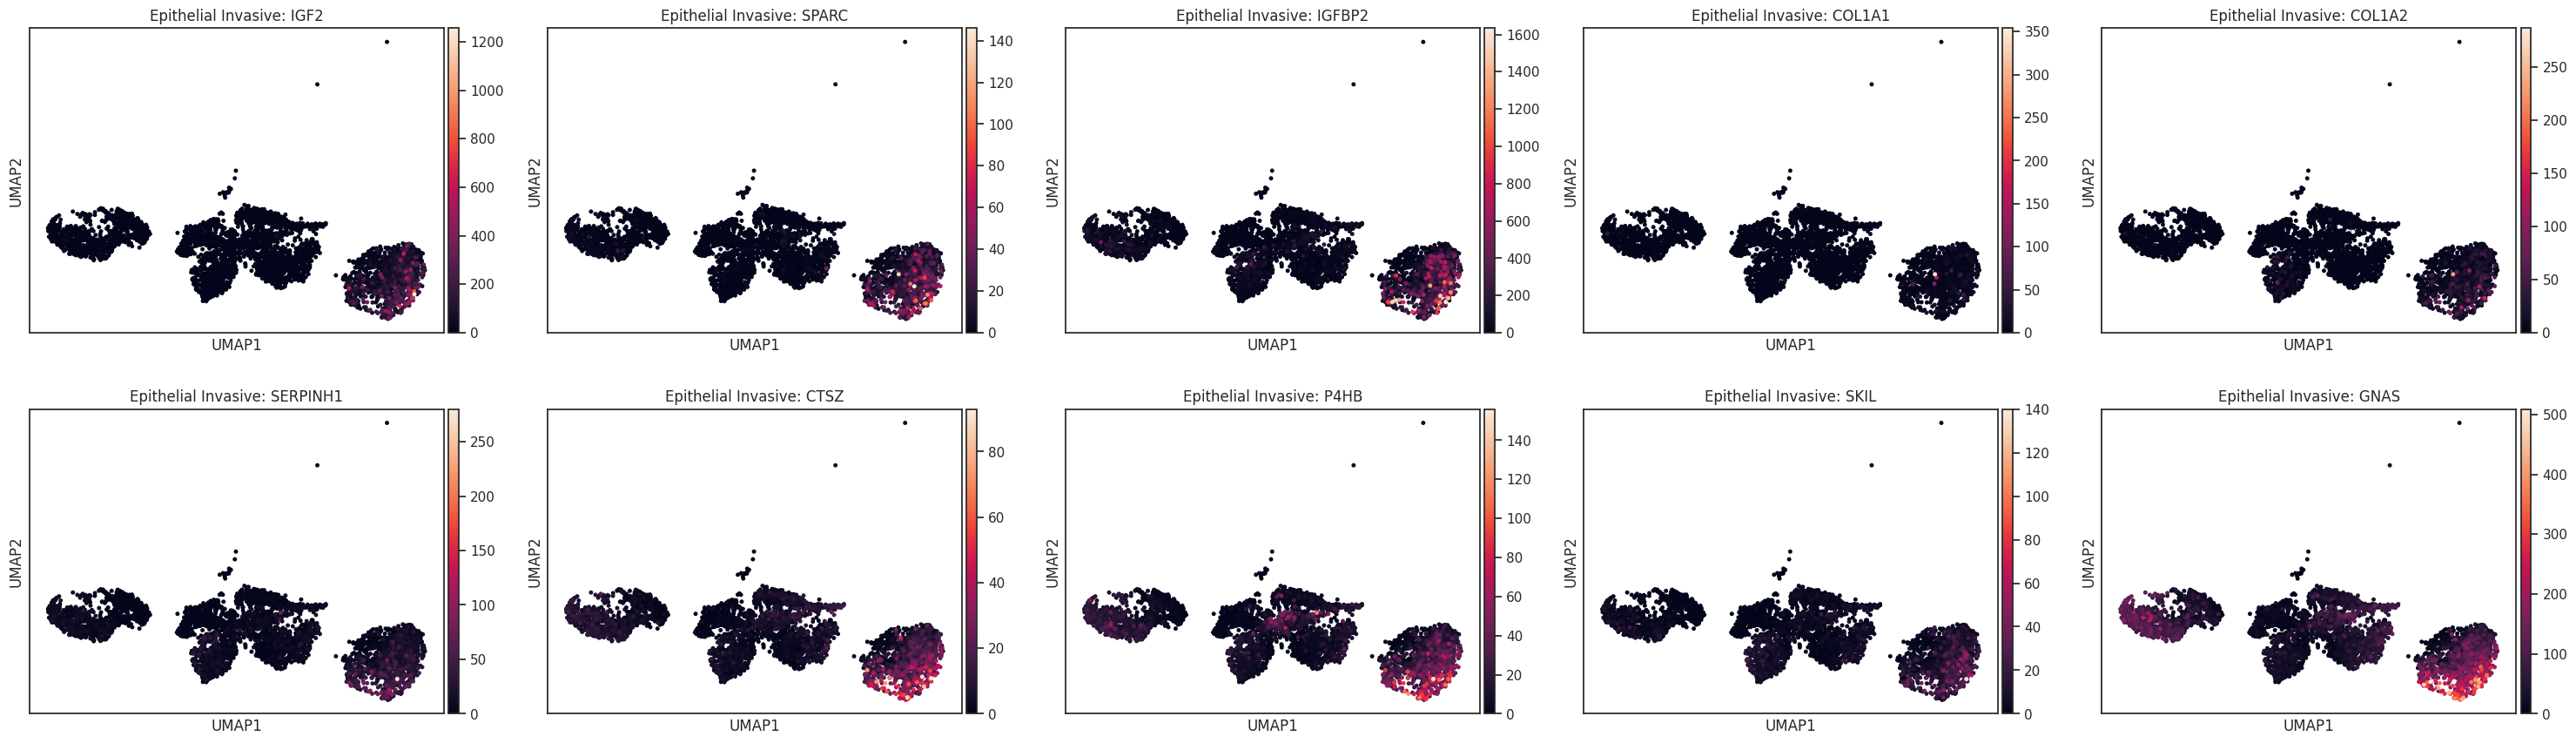

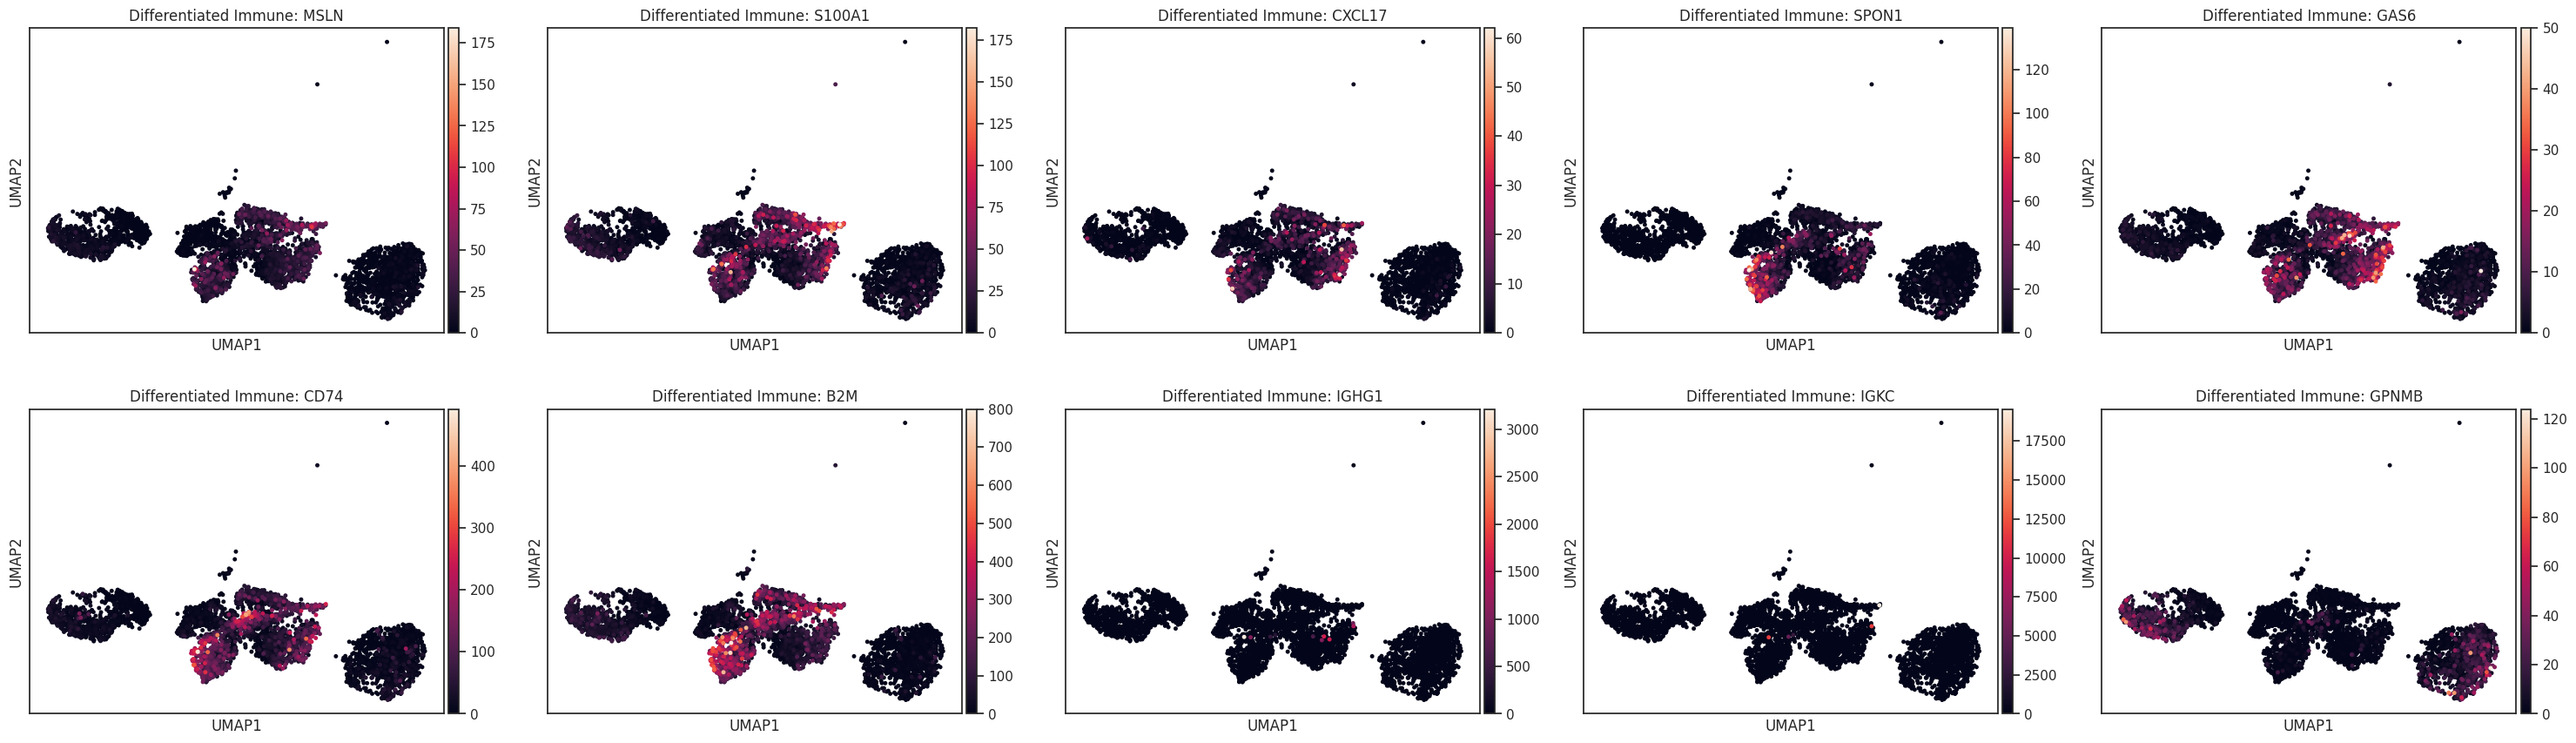

In [56]:
genes_NormalSecretory = [
    "TFF3", "SCGB2A1", "SCGB1D2", "SELENOP", "ERP27",
    "PLA2G16", "CALM1", "APOE", "GSTM3", "C2orf88"
]

genes_EpithelialInvasive = [
    "IGF2", "SPARC", "IGFBP2", "COL1A1", "COL1A2",
    "SERPINH1", "CTSZ", "P4HB", "SKIL", "GNAS"
]

genes_DifferentiatedImmune = [
    "MSLN", "S100A1", "CXCL17", "SPON1", "GAS6",
    "CD74", "B2M", "IGHG1", "IGKC", "GPNMB"
]

sc.pl.umap(
    adata_epi,
    color=genes_NormalSecretory,
    ncols=5,
    size=50,
    title=[f"Normal Secretory: {gene}" for gene in genes_NormalSecretory]
)

sc.pl.umap(
    adata_epi,
    color=genes_EpithelialInvasive,
    ncols=5,
    size=50,
    title=[f"Epithelial Invasive: {gene}" for gene in genes_EpithelialInvasive]
)

sc.pl.umap(
    adata_epi,
    color=genes_DifferentiatedImmune,
    ncols=5,
    size=50,
    title=[f"Differentiated Immune: {gene}" for gene in genes_DifferentiatedImmune]
)

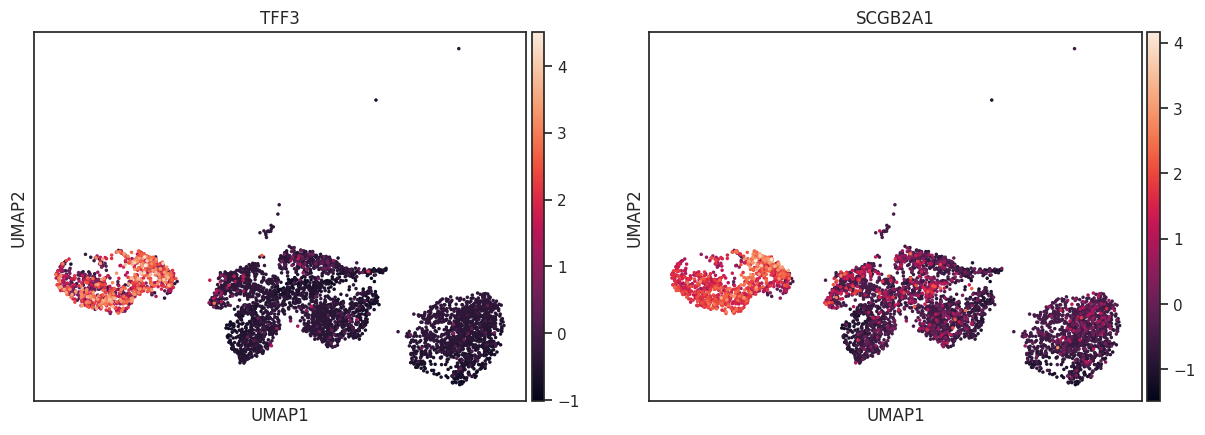

In [57]:
adata_epi.raw = None
sc.pp.scale(adata_epi, max_value=10)
sc.pl.umap(adata_epi, color=["TFF3", "SCGB2A1"], use_raw=False)

saving figure to file figures/umap_NormalSecretory.pdf


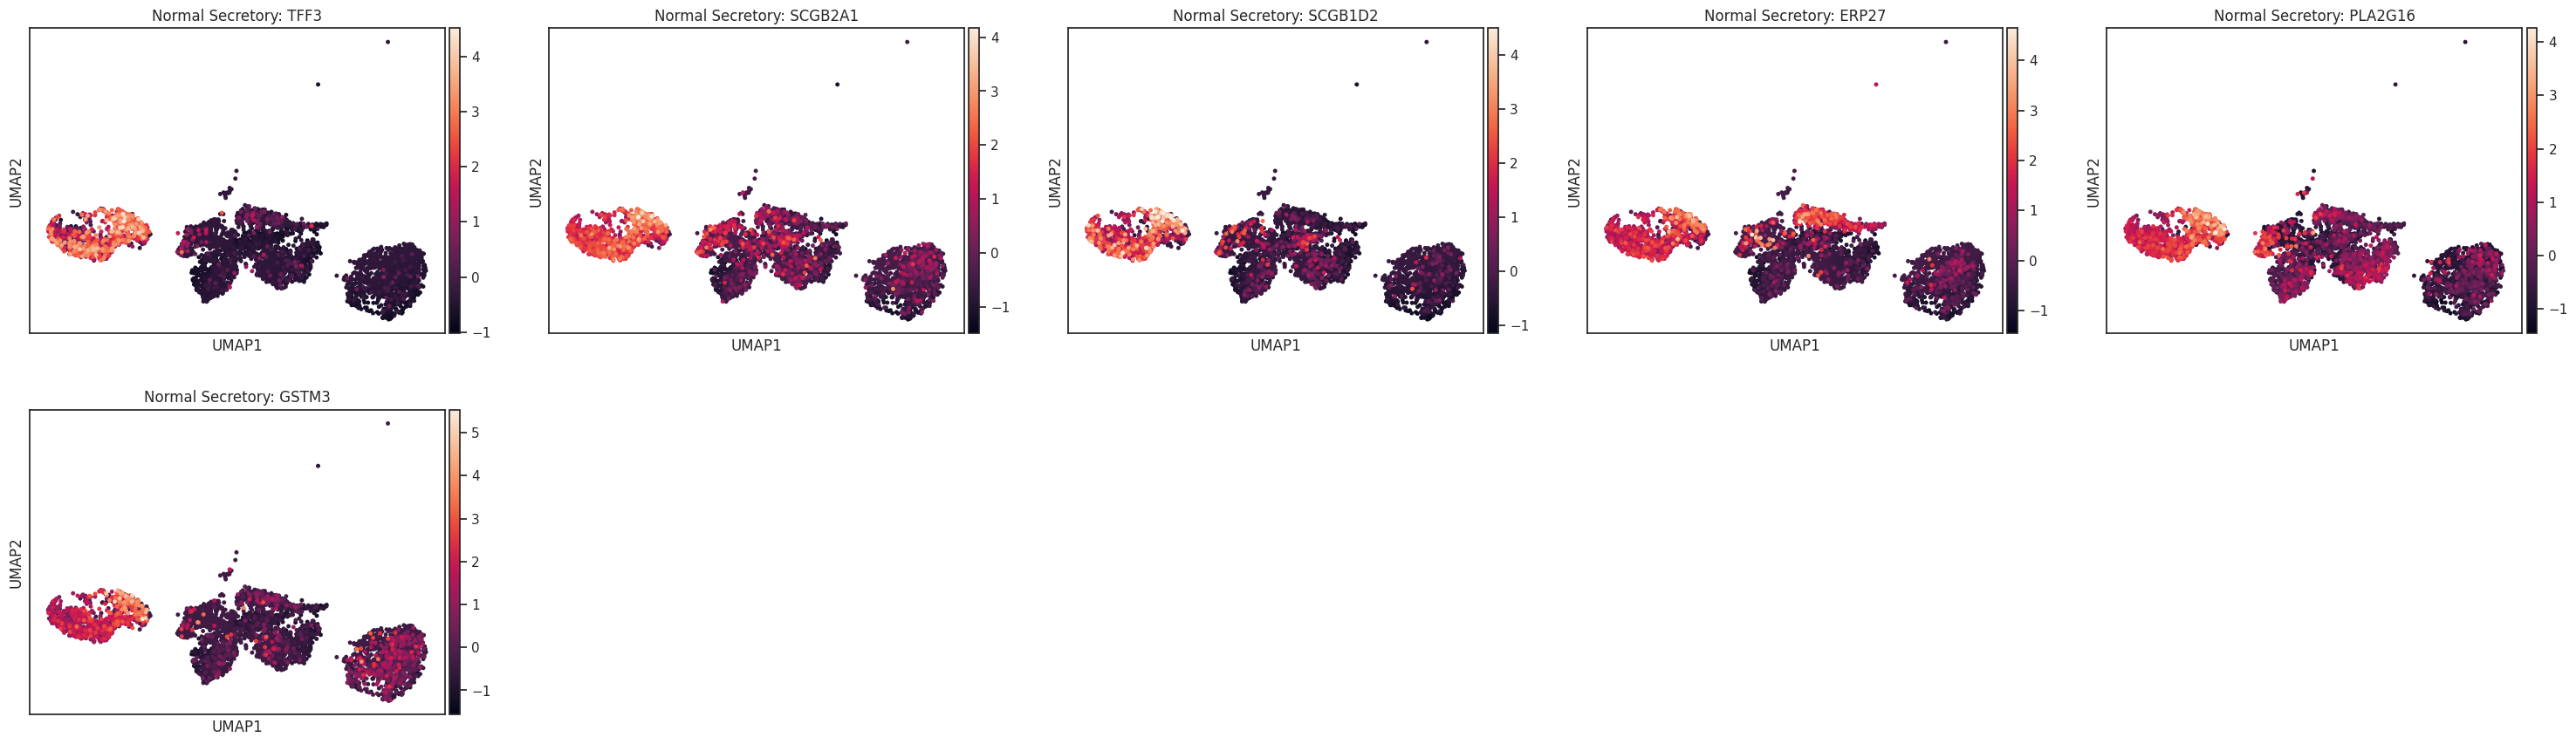

saving figure to file figures/umap_EpithelialInvasive.pdf


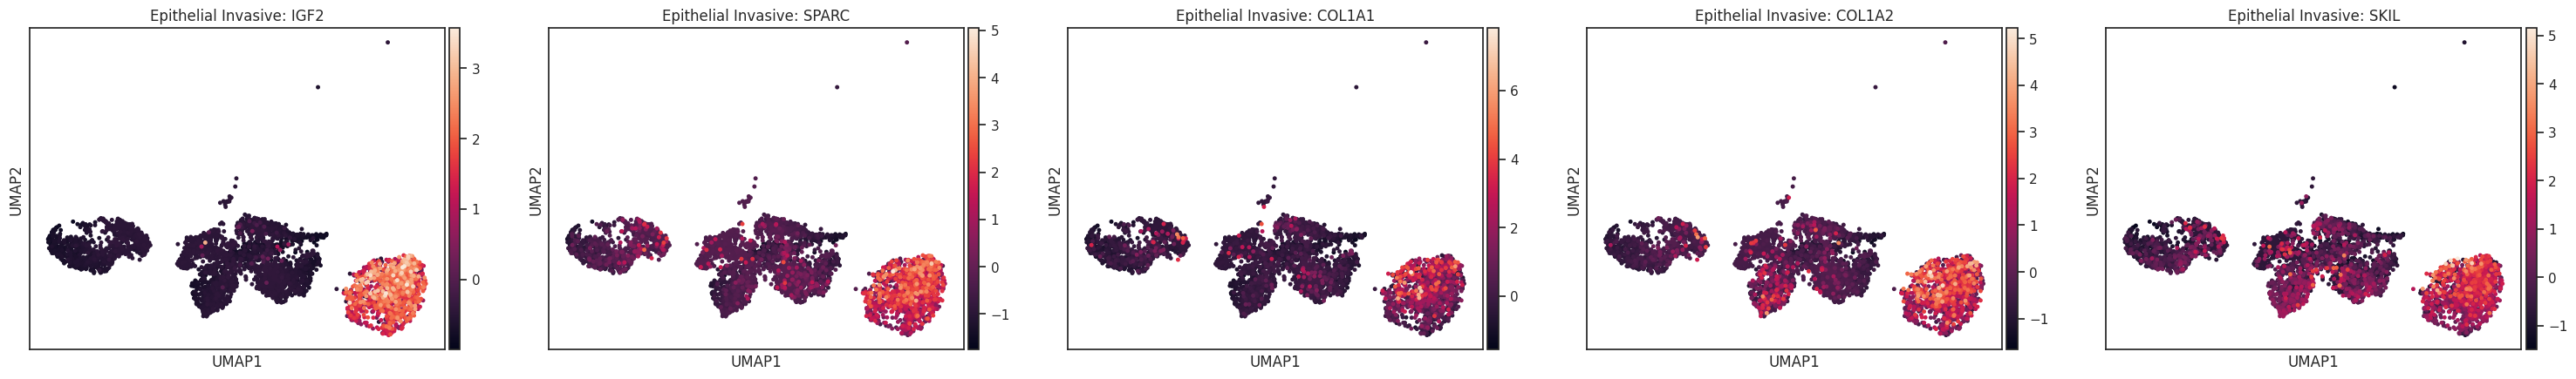

saving figure to file figures/umap_DifferentiatedImmune.pdf


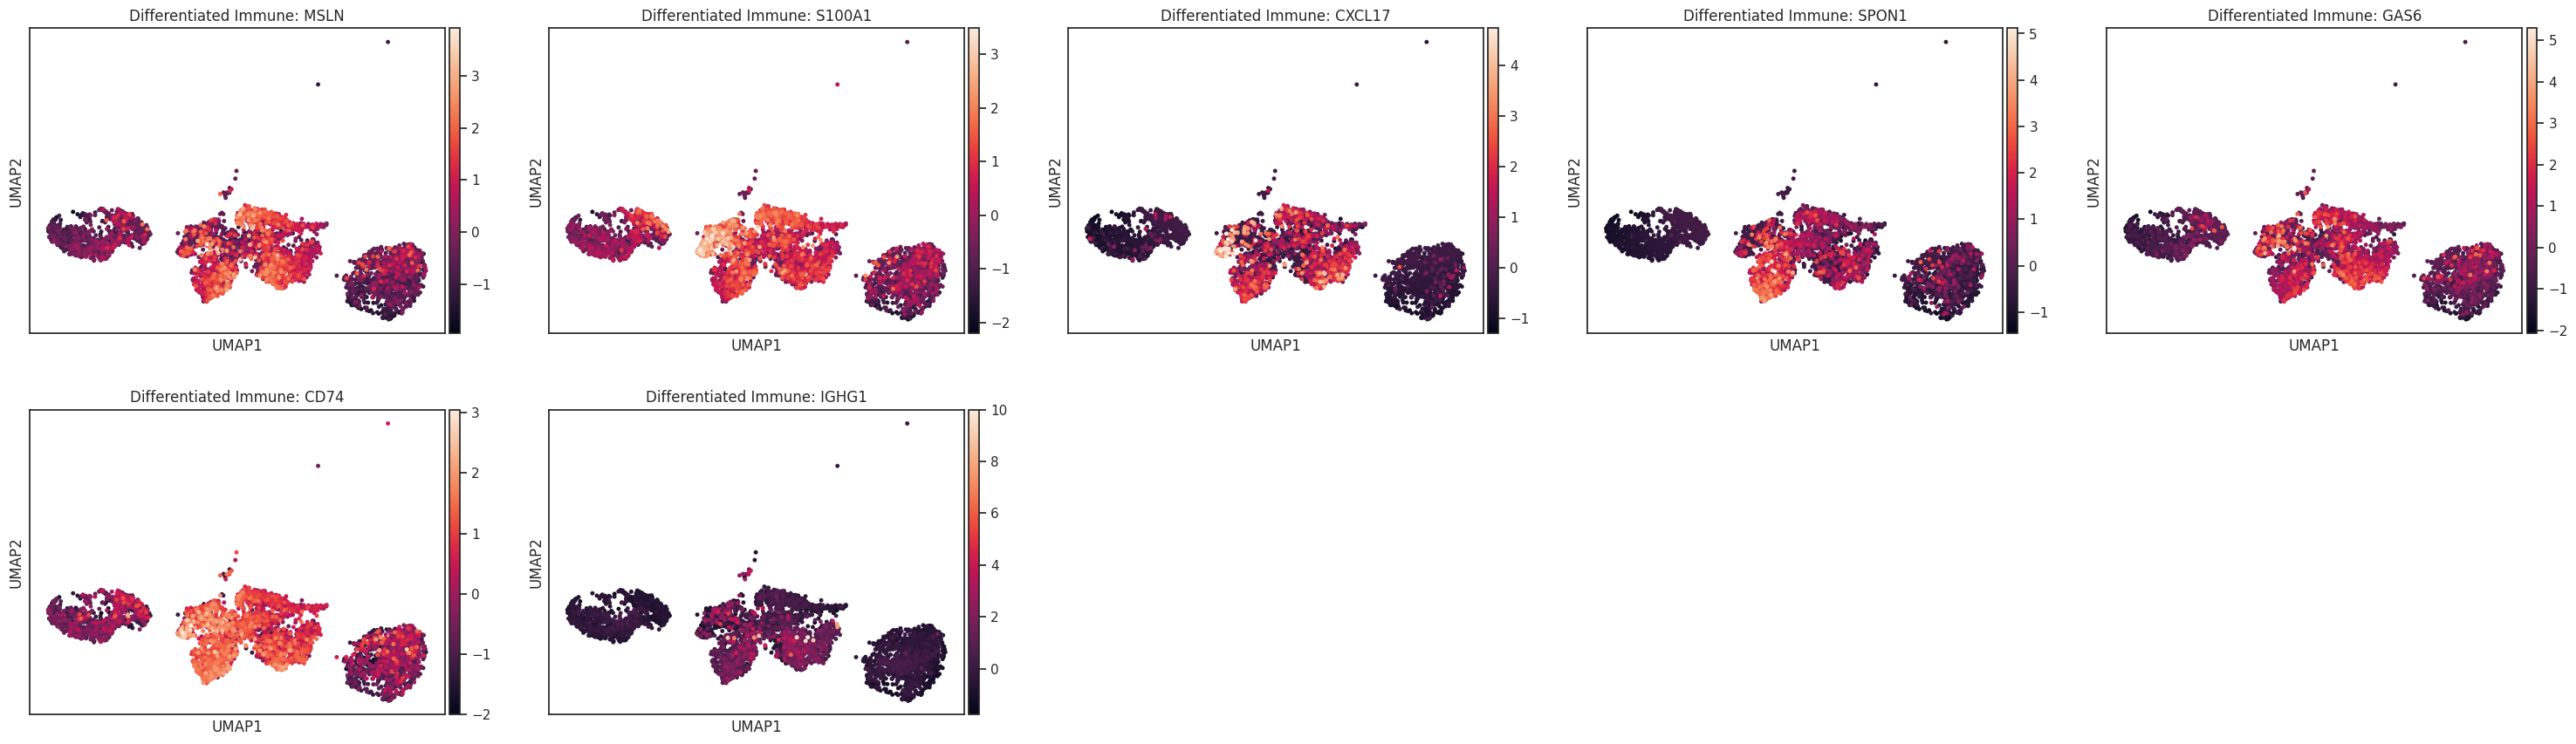

In [58]:
adata_epi.raw = None

sc.pp.scale(adata_epi, max_value=10)

genes_NormalSecretory = [
    "TFF3", "SCGB2A1", "SCGB1D2", "ERP27",
    "PLA2G16", "GSTM3"
]

genes_EpithelialInvasive = [
    "IGF2", "SPARC", "COL1A1", "COL1A2",
    "SKIL"
]

genes_DifferentiatedImmune = [
    "MSLN", "S100A1", "CXCL17", "SPON1", "GAS6",
    "CD74", "IGHG1"
]

sc.pl.umap(
    adata_epi,
    color=genes_NormalSecretory,
    use_raw=False,
    ncols=5,
    size=50,
    title=[f"Normal Secretory: {gene}" for gene in genes_NormalSecretory],
    save="_NormalSecretory.pdf"
)

sc.pl.umap(
    adata_epi,
    color=genes_EpithelialInvasive,
    use_raw=False,
    ncols=5,
    size=50,
    title=[f"Epithelial Invasive: {gene}" for gene in genes_EpithelialInvasive],
    save="_EpithelialInvasive.pdf"
)

sc.pl.umap(
    adata_epi,
    color=genes_DifferentiatedImmune,
    use_raw=False,
    ncols=5,
    size=50,
    title=[f"Differentiated Immune: {gene}" for gene in genes_DifferentiatedImmune],
    save="_DifferentiatedImmune.pdf"
)

In [59]:
sc.pp.scale(adata_epi, max_value=10)

genes_NormalSecretory = [
    "TFF3", "SCGB2A1", "SCGB1D2", "ERP27",
    "PLA2G16", "GSTM3"
]

genes_EpithelialInvasive = [
    "IGF2", "SPARC", "COL1A1", "COL1A2",
    "SKIL"
]

genes_DifferentiatedImmune = [
    "MSLN", "S100A1", "CXCL17", "SPON1", "GAS6",
    "CD74", "IGHG1"
]

sc.tl.score_genes(adata_epi, gene_list=genes_NormalSecretory, score_name="score_NormalSecretory")
sc.tl.score_genes(adata_epi, gene_list=genes_EpithelialInvasive, score_name="score_EpithelialInvasive")
sc.tl.score_genes(adata_epi, gene_list=genes_DifferentiatedImmune, score_name="score_DifferentiatedImmune")

In [60]:
leiden_annotation = {
    "3": "EpithelialDifferentiated",
    "6": "EpithelialInvasive",
    "7": "NormalSecretory"
}
adata_epi.obs["epithelial_subtype"] = adata_epi.obs["leiden"].map(leiden_annotation)
print(adata_epi.obs[["leiden", "epithelial_subtype"]].head())

                     leiden        epithelial_subtype
AAACCCACACCATAAC-1-0      3  EpithelialDifferentiated
AAACCCAGTGAATGTA-1-0      3  EpithelialDifferentiated
AAACCCATCGGCTGTG-1-0      3  EpithelialDifferentiated
AAACGAACACGTACTA-1-0      3  EpithelialDifferentiated
AAAGGGCAGAGGTTTA-1-0      3  EpithelialDifferentiated


saving figure to file figures/umapUMAPs_Scores.pdf


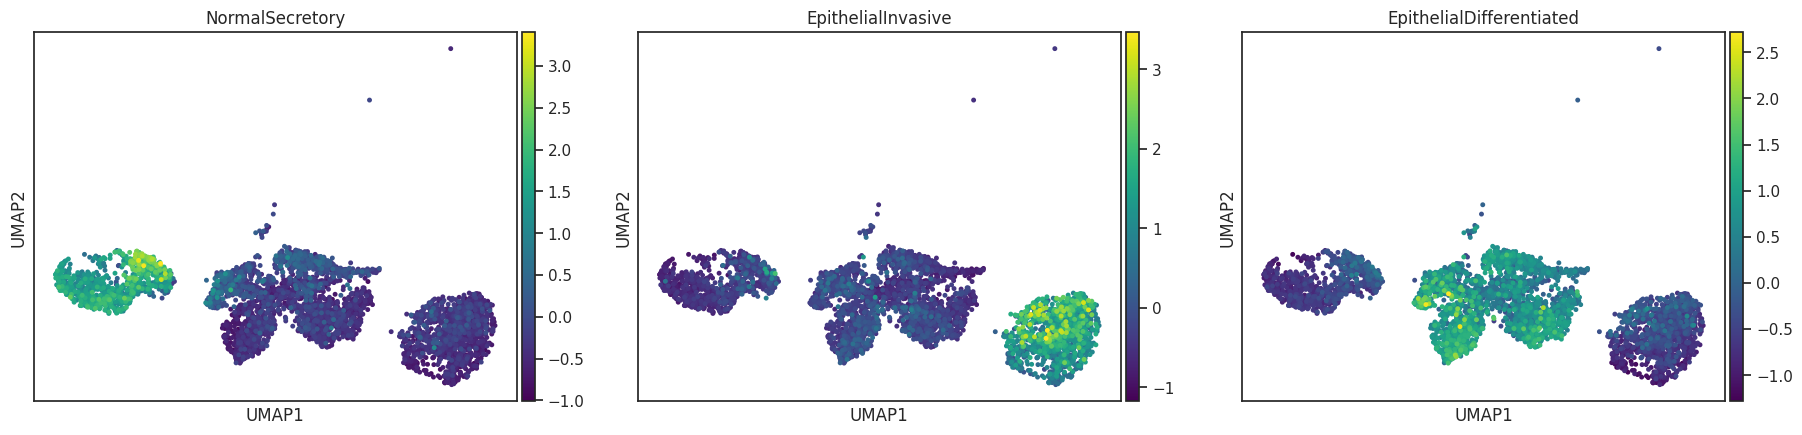

In [61]:
import scanpy as sc

sc.pl.umap(
    adata_epi,
    color=["score_NormalSecretory", "score_EpithelialInvasive", "score_DifferentiatedImmune"],
    cmap="viridis",
    title=["NormalSecretory", "EpithelialInvasive", "EpithelialDifferentiated"],
    ncols=3,
    size=50,
    show=True,
    save="UMAPs_Scores.pdf"
)

## Final gene selection and patient classifier

saving figure to file figures/umap_NormalSecretory.pdf


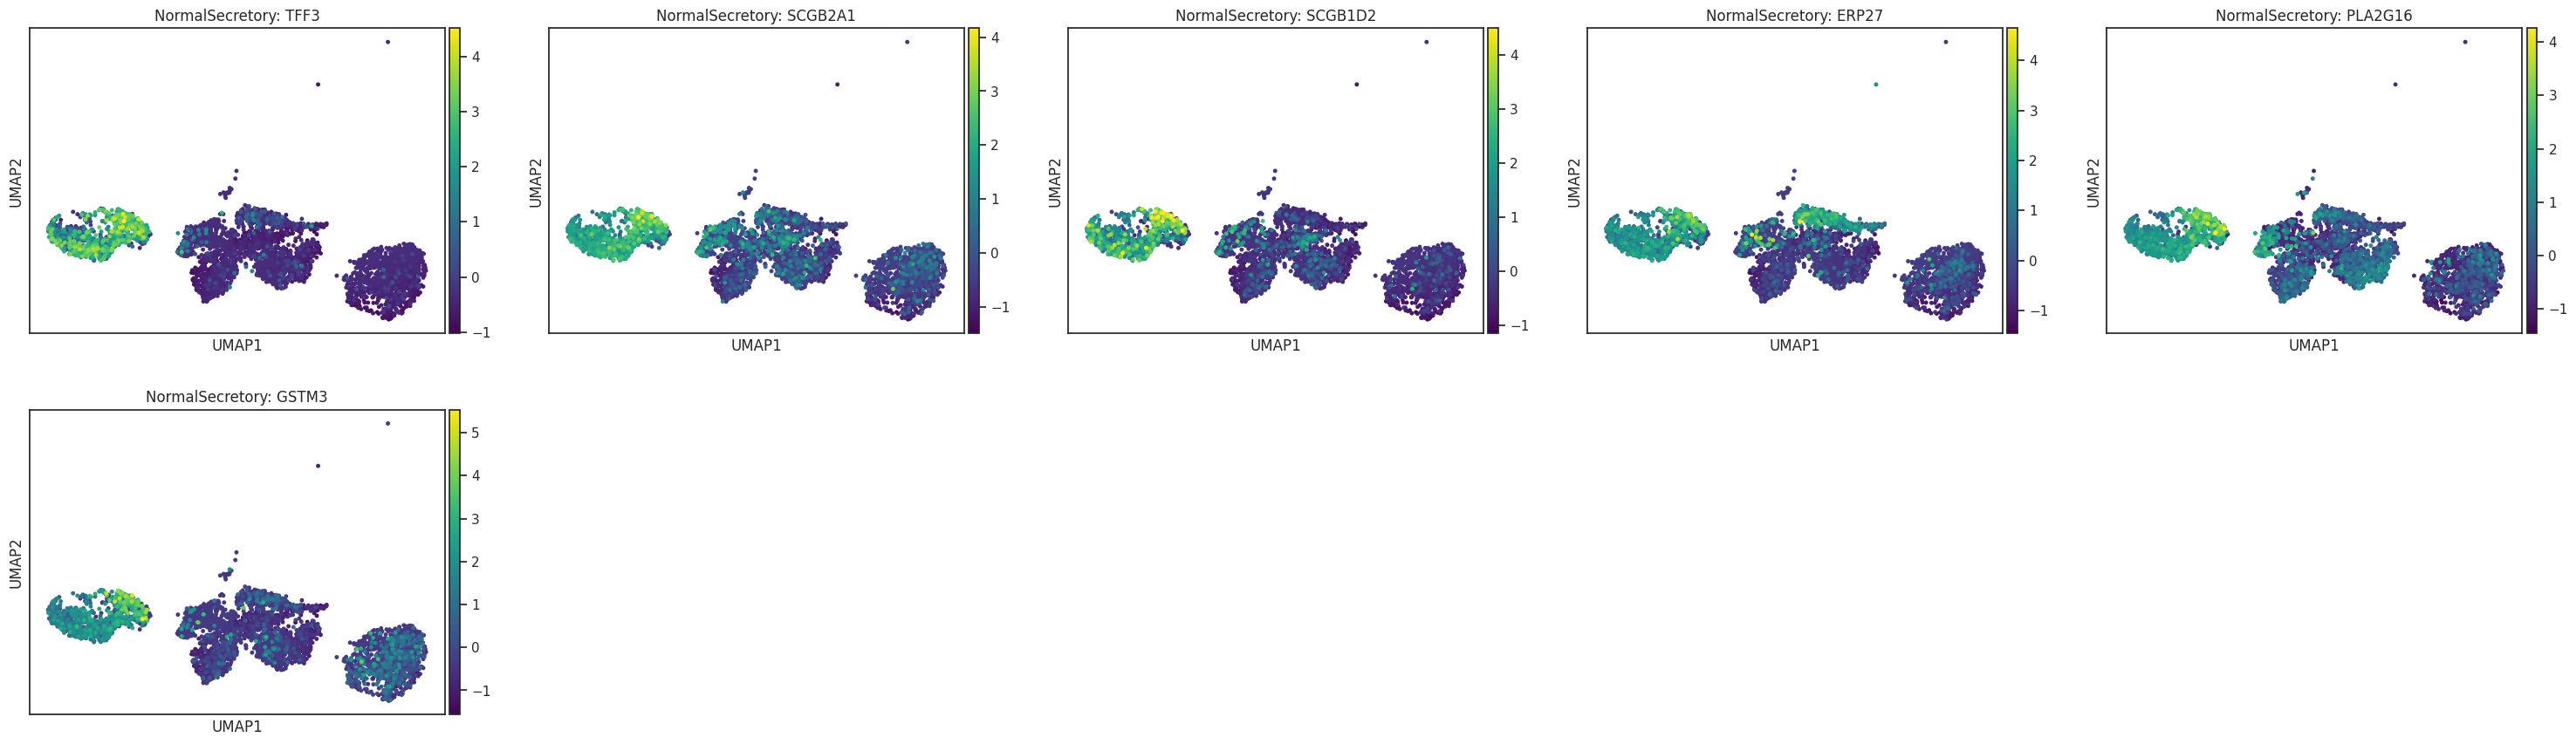

saving figure to file figures/umap_EpithelialInvasive.pdf


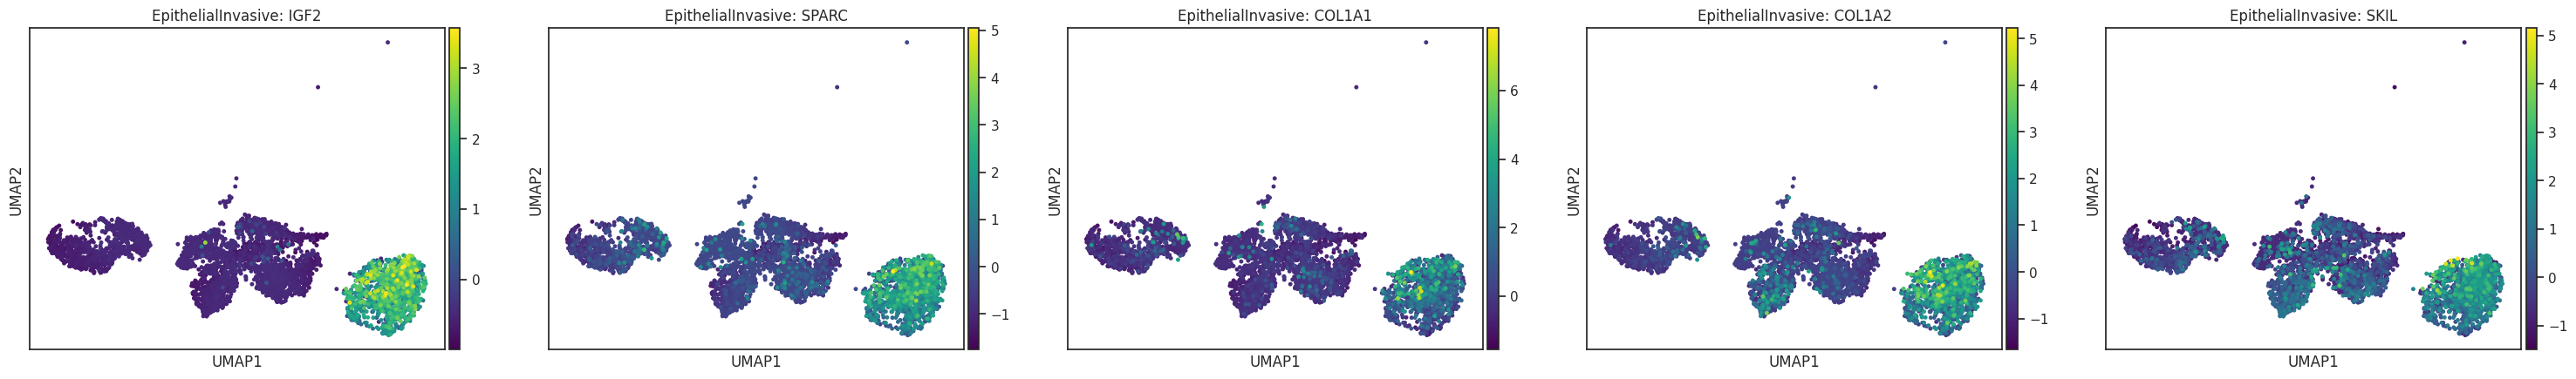

saving figure to file figures/umapEpithelialDifferentiated.pdf


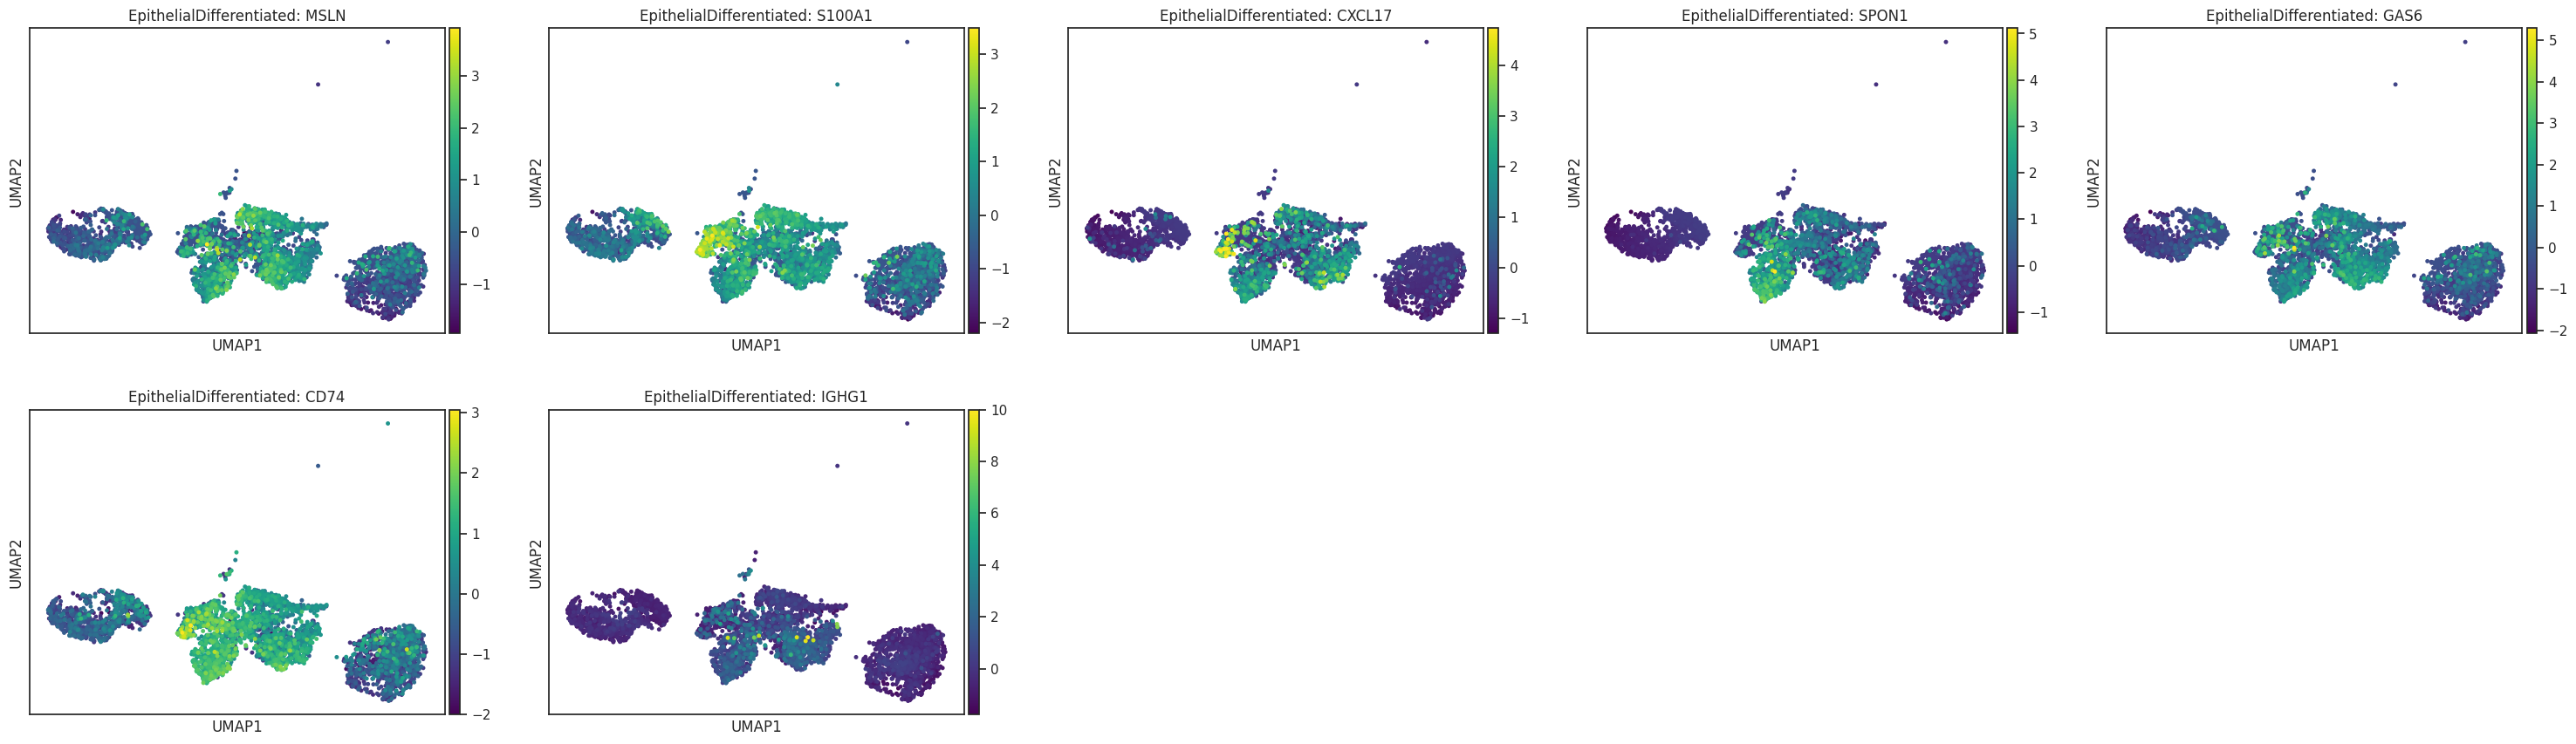

In [62]:
# Quitar raw para evitar usar datos crudos
adata_epi.raw = None

# Escalar toda la matriz (con límite a 10)
sc.pp.scale(adata_epi, max_value=10)

genes_NormalSecretory = [
    "TFF3", "SCGB2A1", "SCGB1D2", "ERP27",
    "PLA2G16", "GSTM3"
]

genes_EpithelialInvasive = [
    "IGF2", "SPARC", "COL1A1", "COL1A2",
    "SKIL"
]

genes_DifferentiatedImmune = [
    "MSLN", "S100A1", "CXCL17", "SPON1", "GAS6",
    "CD74", "IGHG1"
]

# Visualizar y guardar genes Normal Secretory
sc.pl.umap(
    adata_epi,
    color=genes_NormalSecretory,
    use_raw=False,
    ncols=5,
    size=50,
    title=[f"NormalSecretory: {gene}" for gene in genes_NormalSecretory],
    save="_NormalSecretory.pdf",
    cmap="viridis"
)

# Visualizar y guardar genes Epithelial Invasive
sc.pl.umap(
    adata_epi,
    color=genes_EpithelialInvasive,
    use_raw=False,
    ncols=5,
    size=50,
    title=[f"EpithelialInvasive: {gene}" for gene in genes_EpithelialInvasive],
    save="_EpithelialInvasive.pdf",
    cmap="viridis"
)

# Visualizar y guardar genes Differentiated Immune
sc.pl.umap(
    adata_epi,
    color=genes_DifferentiatedImmune,
    use_raw=False,
    ncols=5,
    size=50,
    title=[f"EpithelialDifferentiated: {gene}" for gene in genes_DifferentiatedImmune],
    save="EpithelialDifferentiated.pdf",
    cmap="viridis"
)


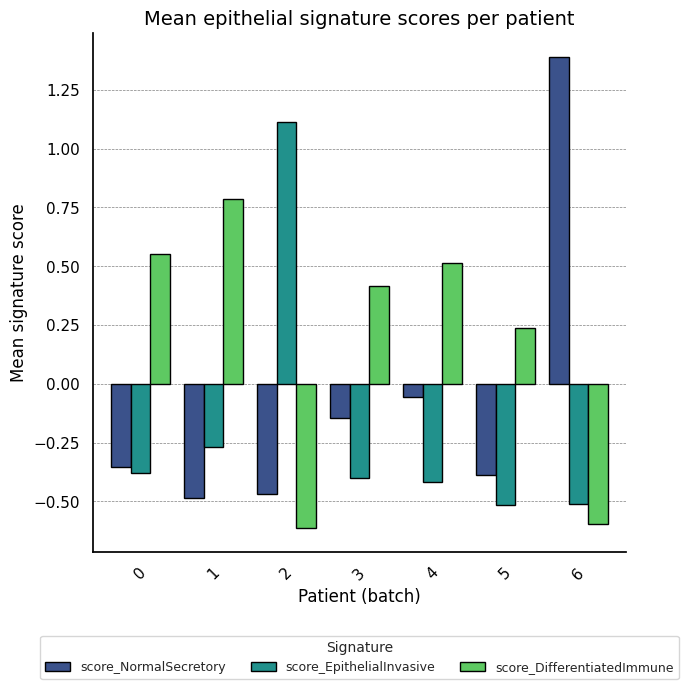

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")

score_means_by_batch = adata_epi.obs.groupby("batch")[[
    "score_NormalSecretory",
    "score_EpithelialInvasive",
    "score_DifferentiatedImmune"
]].mean()

fig, ax = plt.subplots(figsize=(7, 7))  

colors = sns.color_palette("viridis", n_colors=3)

score_means_by_batch.plot(
    kind="bar",
    ax=ax,
    width=0.8,
    color=colors,
    edgecolor="black"
)

ax.spines["left"].set_color("black")
ax.spines["bottom"].set_color("black")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.yaxis.grid(True, linestyle="--", linewidth=0.5, color="gray")
ax.xaxis.grid(False)

ax.set_ylabel("Mean signature score", fontsize=12, color="black")
ax.set_xlabel("Patient (batch)", fontsize=12, color="black")
ax.set_title("Mean epithelial signature scores per patient", fontsize=14, color="black")

ax.tick_params(axis='x', colors='black', rotation=45)
ax.tick_params(axis='y', colors='black')

ax.legend(
    title="Signature",
    fontsize=9,
    title_fontsize=10,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=3,
    frameon=True
)


plt.tight_layout()
plt.subplots_adjust(bottom=0.2) 

plt.savefig("BarPlot_SignaturesByPatient.pdf", dpi=300, bbox_inches='tight')
plt.show()

saving figure to file figures/dotplot_DotPlot_Subpopulations.pdf


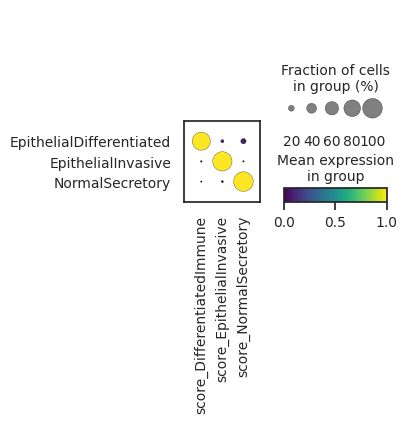

In [64]:
sc.pl.dotplot(
    adata_epi,
    var_names=["score_DifferentiatedImmune", "score_EpithelialInvasive", "score_NormalSecretory"],
    groupby="epithelial_subtype",
    standard_scale="var",
    color_map="viridis",
    save="DotPlot_Subpopulations.pdf"
)